In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
# plt.rcParams['lines.linewidth'] = 1.5
# plt.rcParams['font.size'] = 9
# plt.rcParams["figure.figsize"] = (6.4, 4.8)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = "dotted"
plt.rcParams["errorbar.capsize"] = 2
plt.rcParams["savefig.dpi"] = 200
plt.rcParams["savefig.pad_inches"] = 0.01
# plt.rcParams["savefig.savefig.format"] = "svg"

import pint
from uncertainties import ufloat
from uncertainties import unumpy
ureg = pint.UnitRegistry()

/var/folders/b0/r7cwq3l97dz61k8mlk7tswlc0000gn/T/ipykernel_9043/74310850.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<center><b>Задание</b></center>

1. Познакомьтесь с устройством цифрового осциллографа (или микровольтметра) и настройте его согласно техническому описанию установки.

2. Меняя растяжение резины, наблюдайте качественно за характером изменения её температуры (растяжение производите плавно, без резких движений). Убедитесь, что при максимально растяжении сигнал занимает большую часть экрана осциллографа, не выходя за его пределы. При необходимости настройте масштаб отображения сигнала и положение нуля. Определите диапазон изменения температуры в опыте и оцените погрешность её измерения.

3. Перепишите данные о параметрах установки, указанные на ней и/или в техническом описании (геометрические размеры и параметры резины, характеристики приборов и т.п.).

In [2]:
g = ufloat(9.81, 0.01) * ureg.m / ureg.s ** 2

dl = 1
l0 = ufloat(10, 0.1) * ureg.cm
d0 = ufloat(6.26, 0.5) * ureg.mm
h0 = ufloat(4.76, 0.5) * ureg.mm
rho = ufloat(0.965, 0.001) * ureg.g / ureg.cm ** 3

m0 = (l0 * d0 * h0 * rho).to(ureg.g)

x0 = ufloat(120, 1) * ureg.mm

4. Исследуйте зависимость растяжения резины от нагрузки $\lambda(f)$ при постоянной температуре. Подбирая различные комбинации грузов, получите 15–20 экспериментальных точек, лежащих по возможности равномерно в диапазоне $1 \leq \lambda \leq \lambda_{max}$. Грузы следует класть на подвес и снимать аккуратно,  избегая резких деформаций и колебаний резины.

    Чтобы обеспечить изотермичность измерений, контролируйте температуру на экране осциллографа/микровольтметра. При значимой разнице температур (более $0.1^{\circ}C$) следует дождаться установления теплового равновесия.

    Учитывайте, что на положение груза может оказывать значительное влияние сухое трение (между зажимами 3 и направляющими 4). Уменьшить это влияние можно постукиванием по столу рядом с установкой — при лёгкой тряске груз опустится в положение равновесия.

In [3]:
x1 = []
m1 = []

x1.append(ufloat(125, 1))
m1.append(ufloat(142.7, 0.5) + ufloat(152.0, 0.5))

x1.append(ufloat(140, 1))
m1.append(m1[-1] + ufloat(477.1, 0.1))

x1.append(ufloat(127, 1))
m1.append(m1[0] + ufloat(202.7, 0.1))

x1.append(ufloat(136, 1))
m1.append(m1[-1] + ufloat(165.0, 0.1))

x1.append(ufloat(141, 1))
m1.append(m1[-1] + ufloat(178.0, 0.1))

x1.append(ufloat(153, 1))
# x1.append(ufloat(150, 1))
m1.append(m1[-1] + ufloat(178.0, 0.1))

x1.append(ufloat(156, 1))
m1.append(m1[-1] + ufloat(174.6, 0.1))

x1.append(ufloat(164, 1))
m1.append(m1[-1] + ufloat(176.6, 0.1))

x1.append(ufloat(191, 1))
m1.append(m1[-1] + ufloat(459.8, 0.1))

x1.append(ufloat(195, 1))
m1.append(m1[-2] + ufloat(477.1, 0.1))

x1 = np.array(x1) * ureg.mm
m1 = np.array(m1) * ureg.g

In [4]:
x2 = []
m2 = []

x2.append(ufloat(125, 1))
m2.append(ufloat(142.7, 0.5) + ufloat(152.0, 0.5))

x2.append(ufloat(127, 1))
m2.append(m2[-1] + ufloat(102.3, 0.1))

x2.append(ufloat(133, 1))
m2.append(m2[-1] + ufloat(202.7, 0.1))

x2.append(ufloat(137, 1))
m2.append(m2[-1] + ufloat(165.0, 0.1))

x2.append(ufloat(143, 1))
m2.append(m2[-1] + ufloat(178.0, 0.1))

x2.append(ufloat(150, 1))
m2.append(m2[-1] + ufloat(176.7, 0.1))

x2.append(ufloat(159, 1))
m2.append(m2[-1] + ufloat(174.6, 0.1))

x2.append(ufloat(167, 1))
m2.append(m2[-3] + ufloat(477.1, 0.1))

x2.append(ufloat(157, 1))
m2.append(m2[-5] + ufloat(459.8, 0.1))

x2 = np.array(x2) * ureg.mm
m2 = np.array(m2) * ureg.g

<ErrorbarContainer object of 3 artists>

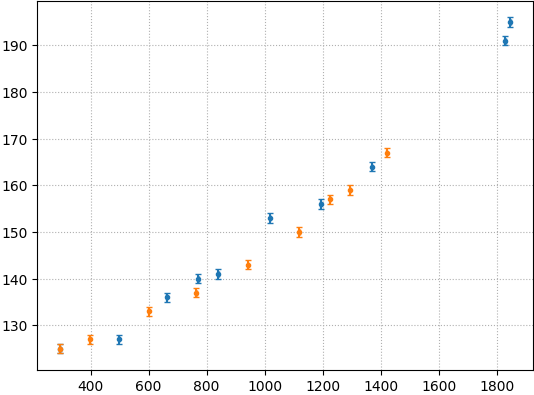

In [5]:
plt.errorbar(
    unumpy.nominal_values(m1.m),
    unumpy.nominal_values(x1.m),
    xerr=unumpy.std_devs(m1.m),
    yerr=unumpy.std_devs(x1.m),
    fmt='.'
)

plt.errorbar(
    unumpy.nominal_values(m2.m),
    unumpy.nominal_values(x2.m),
    xerr=unumpy.std_devs(m2.m),
    yerr=unumpy.std_devs(x2.m),
    fmt='.'
)

In [6]:
def x_to_lambda(x):
    l = x + (l0 - x0)
    return (l / l0).to(ureg.dimensionless)

In [7]:
df_experiment = pd.DataFrame()

lambda_data = x_to_lambda(x2)
f_data = (m2 * g).to(ureg.N)

df_experiment['lambda'] = unumpy.nominal_values(lambda_data.m)
df_experiment['dlambda'] = unumpy.std_devs(lambda_data.m)
df_experiment['f'] = unumpy.nominal_values(f_data.m)
df_experiment['df'] = unumpy.std_devs(f_data.m)
df_experiment

,lambda,dlambda,f,df
0,1.05,0.014151,2.891007,0.007537
1,1.07,0.014159,3.894570,0.008052
2,1.13,0.014202,5.883057,0.009274
3,1.17,0.014244,7.501707,0.010463
4,1.23,0.014328,9.247887,0.011867
5,1.30,0.014457,10.981314,0.013350
6,1.39,0.014670,12.694140,0.014877
7,1.47,0.014903,13.928238,0.015953
8,1.37,0.014618,12.012345,0.014209


In [8]:
header = [r'$\lambda$', r'$\sigma_{{\lambda}}$', r'$f$, $Н$', r'$\sigma_{{f}}$, $Н$']
df_experiment.to_latex(buf=f"tables/table1.tex", index=False, float_format="%.2f", header=header, column_format='cc|cc')

5. Проведите измерение термического эффекта $\Delta T$ в адиабатическом растяжении при 8–10 различных удлинениях $\lambda$.

    а. Перед началом опыта приведите резину в нерастянутое положение и дождитесь установления теплового равновесия внутри кожуха (3–5 минут). ЭДС на термопаре после установления равновесия примите за начало отсчёта, соответствующего равенству температур на концах термопары (это напряжение должно быть близко к нулю, но может отличаться от него из-за несовершенства пайки и внутренней ЭДС усилителя).
    
    б. Установите упор 7 на требуемое расстояние и растяните резину, опустив платформу до упора. Растяжение следует проводить достаточно быстро, чтобы на теплообмен не повлиял на результат, и в то же время достаточно плавно, чтобы минимизировать необратимые явления (оптимальное время 1–2 с).

    в. Измерьте скачок температуры от исходного уровня до максимума (например, с помощью курсорных измерений на экране осциллографа, см. техническое описание работы).

    г. Аккуратно верните резину в нерастянутое состояние и дождитесь установления исходного («нулевого») значения ЭДС термопары.

    д. Каждое измерение повторите не менее 2–3 раз.

In [9]:
x3 = [125, 137, 146, 157, 170, 180, 190, 200, 206, 213]
V = [0, 0.7, 1, 1.5, 3, 4, 5.5, 7.2, 7.7, 9.2]

x3 = unumpy.uarray(x3, 1) * ureg.mm
V = unumpy.uarray(V, 0.1)

In [10]:
df_experiment2 = pd.DataFrame()

lambda_data = x_to_lambda(x3)
T_data = V * 4 / 200 * ureg.celsius

df_experiment2['lambda'] = unumpy.nominal_values(lambda_data.m)
df_experiment2['dlambda'] = unumpy.std_devs(lambda_data.m)
df_experiment2['T'] = unumpy.nominal_values(T_data.m)
df_experiment2['dT'] = unumpy.std_devs(T_data.m)
df_experiment2

,lambda,dlambda,T,dT
0,1.05,0.014151,0.000,0.002
1,1.17,0.014244,0.014,0.002
2,1.26,0.014379,0.020,0.002
3,1.37,0.014618,0.030,0.002
4,1.50,0.015000,0.060,0.002
5,1.60,0.015362,0.080,0.002
6,1.70,0.015780,0.110,0.002
7,1.80,0.016248,0.144,0.002
8,1.86,0.016552,0.154,0.002
9,1.93,0.016926,0.184,0.002


In [11]:
header = [r'$\lambda$', r'$\sigma_{{\lambda}}$', r'$T$, $K$', r'$\sigma_{{f}}$, $K$']
df_experiment2.to_latex(buf=f"tables/table2.tex", index=False, float_format="%.2f", header=header, column_format='cc|cc')

6. Для 2–3 значений $\lambda$ (из использованных в п. 5) проведите измерения зависимости температуры в результате адиабатического растяжения от времени $\Delta T(t)$. Предварительно настройте временну́ю развёртку осциллографа так, чтобы ширина экрана соответствовала времени установления равновесия (~3–5 минут).

    После проведения каждого опыта сохраните полученный график (сохраните на карту памяти или сфотографируйте). Полезно сразу измерить положение 6–8 точек на графике с помощью курсорных измерений на цифровом осциллографе.

<center><b>Обработка результатов измерений</b></center>

7. По результатам измерений п. 4 постройте графики зависимостей силы $f$ от растяжения $\lambda = l/l_0$ в координатах $f(\lambda)$ и $f(\lambda - \frac{1}{\lambda^2})$. Проанализируйте полученные результаты. Можно ли с учётом погрешности опыта считать эти зависимости линейными? Подчиняется ли резина закону Гука и насколько точна модель (16)?

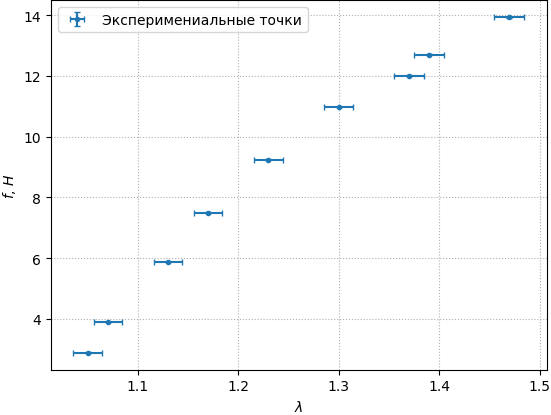

In [12]:
x_name = r'$\lambda$'
y_name = r'$f$, $Н$'

x_data = df_experiment['lambda']
y_data = df_experiment['f']
x_err = df_experiment['dlambda']
y_err = df_experiment['df']

plt.xlabel(x_name)
plt.ylabel(y_name)

plt.errorbar(
    x_data,
    y_data,
    xerr=x_err,
    yerr=y_err,
    fmt=".",
    label="Эксперимениальные точки"
)

plt.legend()
plt.savefig("images/f(lambda)")

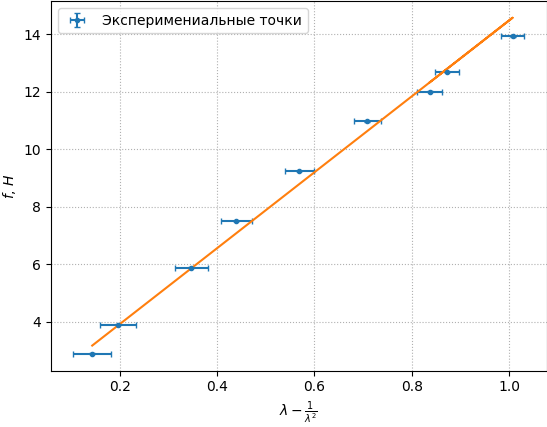

In [13]:
x_name = r'$\lambda - \frac{1}{\lambda^2}$'
y_name = r'$f$, $Н$'

x_udata = unumpy.uarray(df_experiment['lambda'], df_experiment['dlambda'])
x_udata = x_udata - 1 / x_udata ** 2

x_data = unumpy.nominal_values(x_udata)
y_data = df_experiment['f']
x_err = unumpy.std_devs(x_udata)
y_err = df_experiment['df']

plt.xlabel(x_name)
plt.ylabel(y_name)

plt.errorbar(
    x_data,
    y_data,
    xerr=x_err,
    yerr=y_err,
    fmt=".",
    label="Эксперимениальные точки"
)

func = lambda x, a, b: a * x + b
# func = lambda x, a: a * x
popt, pcov = curve_fit(func , xdata=x_data, ydata=y_data, sigma=y_err)
perr = np.sqrt(np.diag(pcov))
a = ufloat(popt[0], perr[0]) * ureg.N
# x_data = np.append(0, x_data)
plt.plot(
    x_data,
    func(x_data, *popt),
)

plt.legend()
plt.savefig("images/f(lambda2)")

8. По полученным зависимостям вычислите модуль Юнга $E$ резины при комнатной температуре. Оцените погрешность результата.

In [14]:
s0 = d0 * h0
E = (3 * a / s0).to(ureg.MPa)
E

1.3293776085973963+/-0.18044448462288182 <Unit('megapascal')>

9. С помощью теоретической модели (16) рассчитайте работу силы $f$ в зависимости от растяжения $A(\lambda)$.

$$A(\lambda) = \frac{1}{3}s_0E(\frac{\lambda^2}{2}+\frac{1}{\lambda}-\frac{3}{2})$$

In [15]:
def get_A(lambda_data):
    A = s0 * E * l0 / 3 * (lambda_data ** 2 / 2 + 1 / lambda_data - 3 / 2)
    A = A.to(ureg.J)
    return A

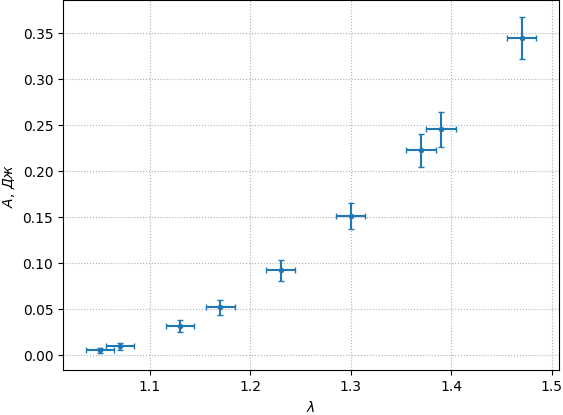

In [16]:
x_name = r'$\lambda$'
y_name = r'$A$, $Дж$'

plt.xlabel(x_name)
plt.ylabel(y_name)

lambda_data = unumpy.uarray(df_experiment['lambda'], df_experiment['dlambda'])
A = get_A(lambda_data)

plt.errorbar(
    unumpy.nominal_values(lambda_data),
    unumpy.nominal_values(A.m),
    xerr=unumpy.std_devs(lambda_data),
    yerr=unumpy.std_devs(A.m),
    fmt='.'
)

plt.savefig('images/A(lambda)')

10. По результатам п. 5 постройте график зависимости $\Delta T(A)$ приращения температуры $\Delta T$ (относительно температуры $T_0$ нерастянутой резины) в зависимости от работы по её адиабатическому растяжению. Проверьте, является ли зависимость линейной. Определите теплоёмкость резиновой полосы образца и удельную теплоёмкость резины. Оцените погрешности.

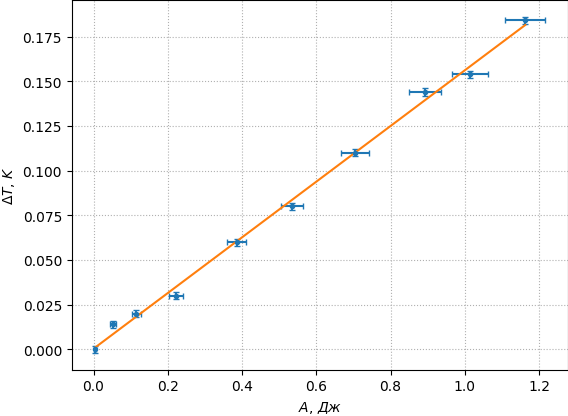

In [17]:
x_name = r'$A$, $Дж$'
y_name = r"$\Delta T$, $K$"

plt.xlabel(x_name)
plt.ylabel(y_name)

lambda_data = unumpy.uarray(df_experiment2['lambda'], df_experiment2['dlambda'])
A_data = get_A(lambda_data)
T_data = unumpy.uarray(df_experiment2['T'], df_experiment2['dT']) * ureg.celsius

x_data = unumpy.nominal_values(A_data.m)

plt.errorbar(
    unumpy.nominal_values(A_data.m),
    unumpy.nominal_values(T_data.m),
    xerr=unumpy.std_devs(A_data.m),
    yerr=unumpy.std_devs(T_data.m),
    fmt='.'
)

func = lambda x, a, b: a * x + b
# func = lambda x, a: a * x
popt, pcov = curve_fit(func,
    unumpy.nominal_values(A_data.m),
    unumpy.nominal_values(T_data.m),
    sigma=unumpy.std_devs(T_data.m),
)
perr = np.sqrt(np.diag(pcov))
a = ufloat(popt[0], perr[0])
# x_data = np.append(0, x_data)
plt.plot(
    x_data,
    func(x_data, *popt),
)

plt.savefig('images/T(A)')

In [18]:
C = ureg.Quantity(1 / a, ureg.J / ureg.degK)
C

6.418433742362992+/-0.12664565682171075 <Unit('joule / kelvin')>

In [19]:
c = ureg.Quantity(1 / a / m0.m, ureg.J / ureg.degK / ureg.g)
c

2.2321350296748155+/-0.298671030344761 <Unit('joule / gram / kelvin')>

11. По результатам п. 6 постройте графики зависимостей логарифма приращения температуры $\ln(\frac{\Delta T}{T_0})$ от времени $t$. Экстраполируйте получившиеся зависимости к моменту начала растяжения и определите соответствующее приращение температуры образца. Рассчитайте аналогично п. 10 значение теплоёмкости резины и сравните результаты двух методов.

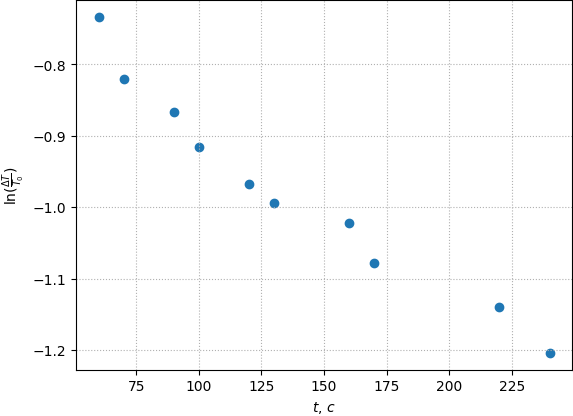

In [20]:
t_data = unumpy.uarray([60, 70, 90, 100, 120, 130, 160, 170, 220, 240], 10)
T_data = unumpy.uarray([24, 22, 21, 20, 19, 18.5, 18, 17, 16, 15], 4) * 4 / 200
Tlog_data = unumpy.log(T_data)
plt.scatter(
    unumpy.nominal_values(t_data),
    unumpy.nominal_values(Tlog_data),
    # xerr=unumpy.std_devs(t_data),
    # yerr=unumpy.std_devs(Tlog_data),
    # fmt='.'
)

plt.xlabel('$t$, $с$')
plt.ylabel(r'$\ln(\frac{\Delta T}{T_0})$')

plt.savefig('images/T(t)')


12. По полученным значениям теплоёмкости и модуля Юнга оцените коэффициент теплового расширения резины $\alpha$. Сравните результаты с табличными данными для мягкой резины.

/var/folders/b0/r7cwq3l97dz61k8mlk7tswlc0000gn/T/ipykernel_9043/423910249.py:18: RuntimeWarning: divide by zero encountered in log2
  np.log2(x_data),


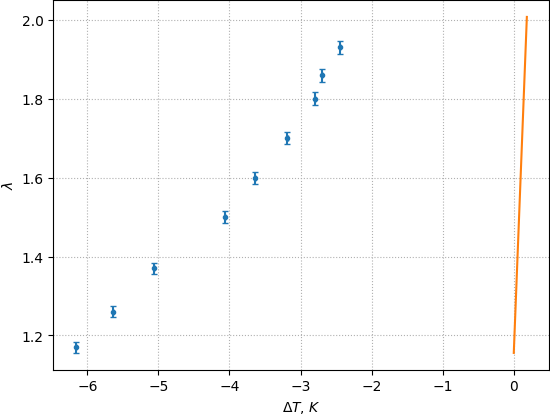

In [21]:
x_name = r"$\Delta T$, $K$"
y_name = r'$\lambda$'

plt.xlabel(x_name)
plt.ylabel(y_name)

lambda_data = unumpy.uarray(df_experiment2['lambda'], df_experiment2['dlambda']) * ureg.dimensionless
T_data = unumpy.uarray(df_experiment2['T'], df_experiment2['dT']) * ureg.celsius

x_data = unumpy.nominal_values(T_data.m)
y_data = unumpy.nominal_values(lambda_data.m)
x_err = unumpy.std_devs(T_data.m)
y_err = unumpy.std_devs(lambda_data.m)

x_data = unumpy.nominal_values(T_data.m)

plt.errorbar(
    np.log2(x_data),
    y_data,
    xerr=x_err,
    yerr=y_err,
    fmt='.'
)

func = lambda x, a, b: a * x + b
# func = lambda x, a: a * x
popt, pcov = curve_fit(func,
    x_data,
    y_data,
    sigma=y_err,
)
perr = np.sqrt(np.diag(pcov))
a = ufloat(popt[0], perr[0])
# x_data = np.append(0, x_data)
plt.plot(
    x_data,
    func(x_data, *popt),
)